Author: Tran Son Giang

# Importing of libraries needed to handle the data and EDA

In [ ]:
# Importing necessary libraries
import pandas as pd  # pandas for data manipulation and analysis
import numpy as np  # numpy for numerical operations
import matplotlib.pyplot as plt  # matplotlib for plotting graphs
import seaborn as sns  # seaborn for statistical data visualization
from statsmodels.graphics.mosaicplot import mosaic  # mosaic plot for categorical data visualization
import missingno as msno  # missingno for visualizing missing data
from scipy.stats import skewnorm  # skewnorm for skewed distribution in statistics

# Importing machine learning modules
from sklearn.model_selection import train_test_split  # function to split data into training and testing sets

# Importing necessary tools for preprocessing, model evaluation, and model training
from sklearn import impute, metrics, model_selection, preprocessing, tree  # various tools for imputation, metrics, and machine learning algorithms
from sklearn.pipeline import make_pipeline  # function to chain multiple steps in a model pipeline
from sklearn.preprocessing import StandardScaler  # for scaling/standardizing data
from sklearn.model_selection import RepeatedKFold  # for repeated k-fold cross-validation



# Connect Google Drive to the notebook and import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in data from csv file

In [ ]:
df_data = pd.read_csv('/climate_change_dataset.csv')
df_data.head()

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5
3,2010,Argentina,5.9,1.8,3.2,1892,1069669579,23.7,7,17.7
4,2007,Germany,26.9,5.6,2.4,1743,124079175,12.5,4,17.4


In [ ]:
# Getting the shape (dimensions) of the DataFrame 'df_data'
# Returns a tuple: (number of rows, number of columns)
df_data.shape

(1000, 10)

In [ ]:
# Summarizing the DataFrame 'df_data' by providing descriptive statistics
df_data.describe(include='all')

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
unique,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.432000,NaN,19.883100,10.425800,3.009600,1738.761000,7.053830e+08,27.300500,7.291000,40.572000
std,7.147199,NaN,8.542897,5.614665,1.146081,708.976616,4.093910e+08,12.970808,4.422655,17.398998
min,2000.000000,NaN,5.000000,0.500000,1.000000,501.000000,3.660891e+06,5.100000,0.000000,10.100000
25%,2005.000000,NaN,12.175000,5.575000,2.000000,1098.750000,3.436242e+08,16.100000,3.000000,25.600000
50%,2012.000000,NaN,20.100000,10.700000,3.000000,1726.000000,7.131166e+08,27.150000,8.000000,41.150000
75%,2018.000000,NaN,27.225000,15.400000,4.000000,2362.500000,1.073868e+09,38.925000,11.000000,55.800000


In [ ]:
# Displaying concise summary information about the DataFrame 'df_data'
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1000 non-null   int64  
 1   Country                      1000 non-null   object 
 2   Avg Temperature (°C)         1000 non-null   float64
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64
 4   Sea Level Rise (mm)          1000 non-null   float64
 5   Rainfall (mm)                1000 non-null   int64  
 6   Population                   1000 non-null   int64  
 7   Renewable Energy (%)         1000 non-null   float64
 8   Extreme Weather Events       1000 non-null   int64  
 9   Forest Area (%)              1000 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 78.2+ KB


# Split the data into a test and train set

In [ ]:
# Split data into features (X) and targets (y)
y = df_data['Avg Temperature (°C)']
X = df_data.drop(labels=['Avg Temperature (°C)'], axis = 'columns')

In [ ]:
# Divide data into train (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the size of the data sets
print(f"X_train\nShape: {X_train.shape}\n")
print(f"X_test\nShape: {X_test.shape}\n")
print(f"y_train\nShape: {y_train.shape}\n")
print(f"y_test\nShape: {y_test.shape}\n")

X_train
Shape: (750, 9)

X_test
Shape: (250, 9)

y_train
Shape: (750,)

y_test
Shape: (250,)



In [ ]:
# Merging the features (X_train) and target (y_train) DataFrames into a single DataFrame 'df_train'
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)

In [ ]:
# Merging the features (X_test) and target (y_test) DataFrames into a single DataFrame 'df_test'
df_test = pd.merge(X_test, y_test, left_index=True, right_index=True)

#Exploratory Data Analysis

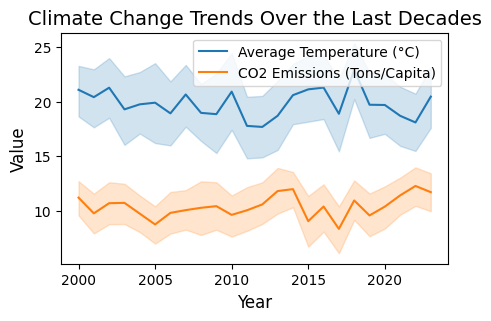

In [ ]:
# The chart shows trends in average temperatures and CO2 emissions by year
plt.figure(figsize=(5, 3))

# Plot average temperature trend
sns.lineplot(x='Year', y='Avg Temperature (°C)', data=df_train, label='Average Temperature (°C)')

# Plot per capita CO2 emissions trend
sns.lineplot(x='Year', y='CO2 Emissions (Tons/Capita)', data=df_train, label='CO2 Emissions (Tons/Capita)')

plt.title('Climate Change Trends Over the Last Decades', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.show()

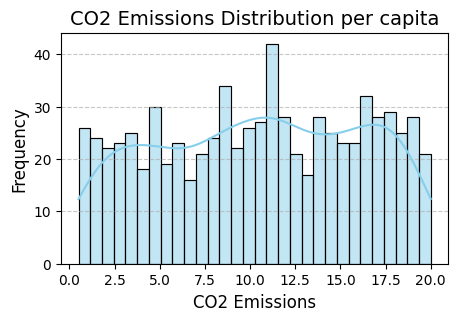

In [ ]:
# CO2 emission distribution analysis
plt.figure(figsize=(5, 3))
sns.histplot(data=df_train, x='CO2 Emissions (Tons/Capita)', bins=30, kde=True, color='skyblue')
plt.title('CO2 Emissions Distribution per capita', fontsize=14)
plt.xlabel('CO2 Emissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

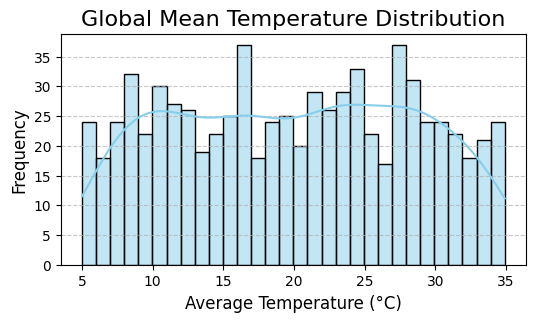

In [ ]:
# Histogram plot for global temperature distribution
plt.figure(figsize=(6, 3))
sns.histplot(data=df_train, x="Avg Temperature (°C)", bins=30, kde=True, color="skyblue")
plt.title("Global Mean Temperature Distribution", fontsize=16)
plt.xlabel("Average Temperature (°C)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

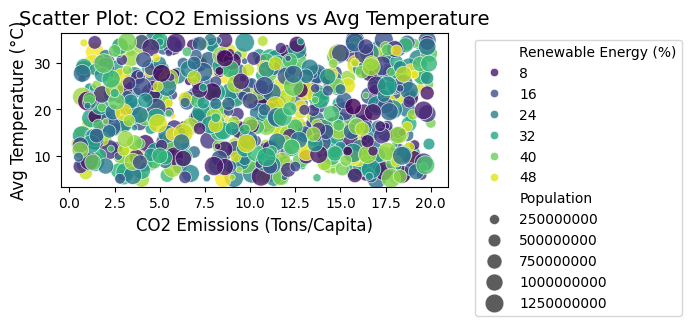

In [ ]:
# Scatter plot  Seaborn
plt.figure(figsize=(5, 2))
sns.scatterplot(
    x="CO2 Emissions (Tons/Capita)",
    y="Avg Temperature (°C)",
    data=df_train,
    hue="Renewable Energy (%)",  # Group by Renewable Energy (%)
    size="Population",          # Point size is based on population
    palette="viridis",
    sizes=(20, 200),
    alpha=0.8)
plt.title("Scatter Plot: CO2 Emissions vs Avg Temperature", fontsize=14)
plt.xlabel("CO2 Emissions (Tons/Capita)", fontsize=12)
plt.ylabel("Avg Temperature (°C)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

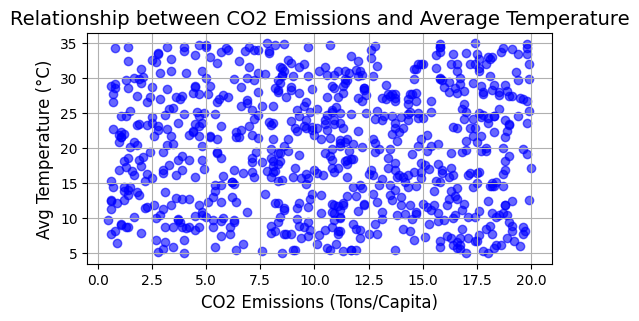

In [ ]:


# Scatter plot for CO2 Emissions and Avg Temperature
plt.figure(figsize=(6, 3))
plt.scatter(df_train["CO2 Emissions (Tons/Capita)"], df_train["Avg Temperature (°C)"], alpha=0.6, color="blue")
plt.title("Relationship between CO2 Emissions and Average Temperature", fontsize=14)
plt.xlabel("CO2 Emissions (Tons/Capita)", fontsize=12)
plt.ylabel("Avg Temperature (°C)", fontsize=12)
plt.grid(True)
plt.show()


<Axes: xlabel='Sea Level Rise (mm)', ylabel='Avg Temperature (°C)'>

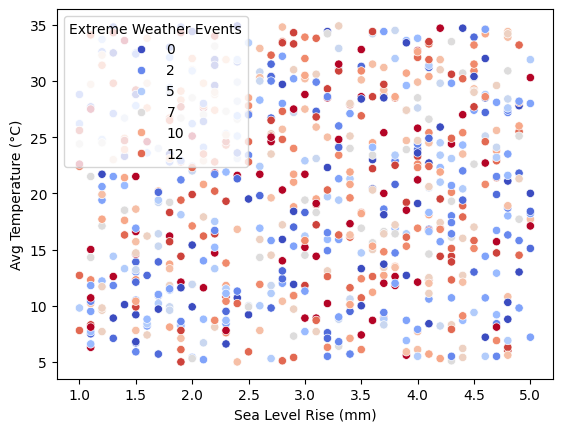

In [ ]:
# scatter plot using Seaborn to visualize the relationship between Sea Level Rise and Average Temperature
sns.scatterplot(
    x="Sea Level Rise (mm)",
    y="Avg Temperature (°C)",
    data=df_train,
    hue="Extreme Weather Events",
    palette="coolwarm"
)


<Axes: xlabel='Rainfall (mm)', ylabel='Avg Temperature (°C)'>

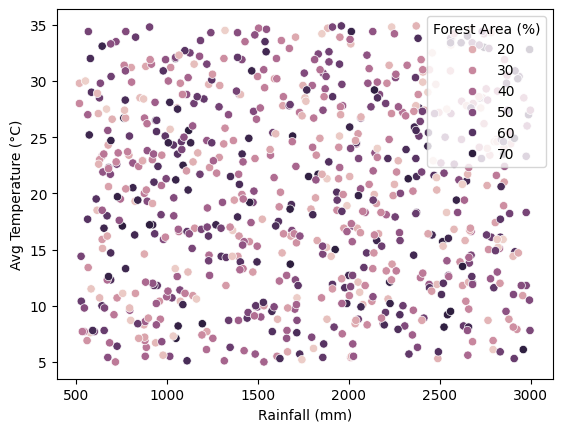

In [ ]:
# Creating a scatter plot using Seaborn to visualize the relationship between Rainfall and Average Temperature
sns.scatterplot(
    x="Rainfall (mm)",
    y="Avg Temperature (°C)",
    data=df_train,
    hue="Forest Area (%)"
)


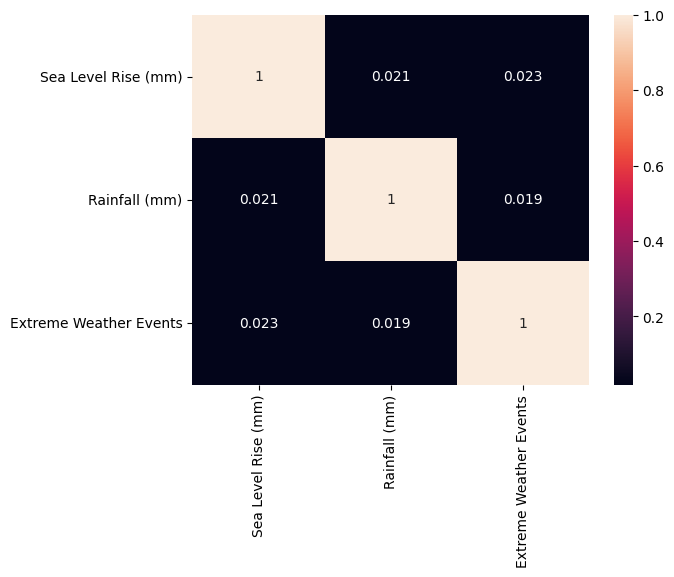

In [ ]:
# heatmap of sea level rainfall and extreme weather events
corr_matrix = df_train[['Sea Level Rise (mm)', 'Rainfall (mm)', 'Extreme Weather Events']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: >

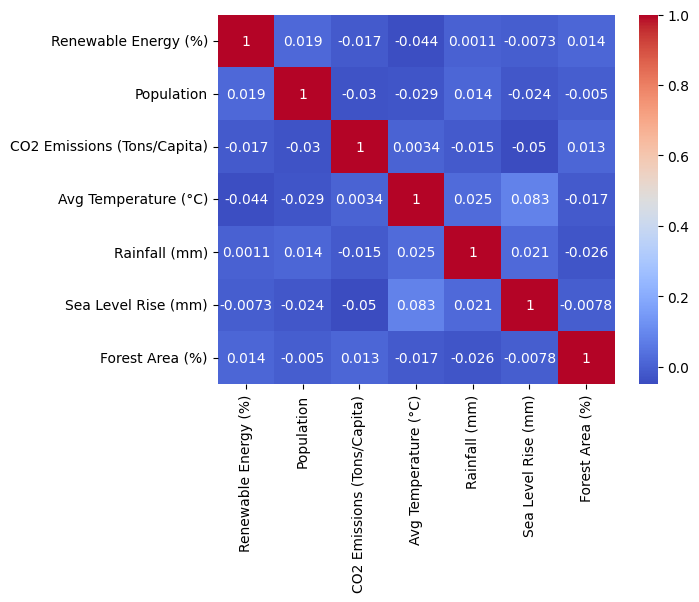

In [ ]:
# heatmap of temperature and some important features
correlation = df_train[['Renewable Energy (%)', 'Population', 'CO2 Emissions (Tons/Capita)', 'Avg Temperature (°C)', 'Rainfall (mm)', 'Sea Level Rise (mm)', 'Forest Area (%)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

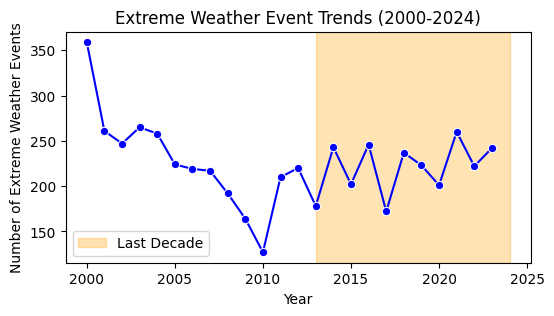

In [ ]:
# Filter data for available year range (2000 to 2024)
data_recent_24_years = df_train[(df_train['Year'] >= 2000) & (df_train['Year'] <= 2024)]
# Aggregate number of extreme weather events per year
extreme_events_per_year = data_recent_24_years.groupby('Year')['Extreme Weather Events'].sum().reset_index()

# Create a line plot for extreme weather event trends
plt.figure(figsize=(6, 3))
sns.lineplot(data=extreme_events_per_year, x='Year', y='Extreme Weather Events', marker='o', color='b')
plt.title("Extreme Weather Event Trends (2000-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Extreme Weather Events")
# Highlights of the last decade (2013 - 2024)
plt.axvspan(2013, 2024, color="orange", alpha=0.3, label="Last Decade")
plt.legend()
plt.show()

Mean: 27.46
Standard Deviation: 13.07
Variance: 170.80


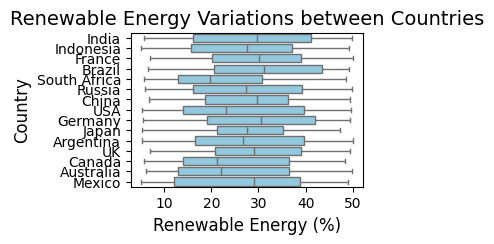

In [ ]:
# Statistical Analysis
mean_renewable = df_train['Renewable Energy (%)'].mean()
std_renewable = df_train['Renewable Energy (%)'].std()
var_renewable = df_train['Renewable Energy (%)'].var()

print(f"Mean: {mean_renewable:.2f}")
print(f"Standard Deviation: {std_renewable:.2f}")
print(f"Variance: {var_renewable:.2f}")

# Boxplot visualization
plt.figure(figsize=(3, 2))
sns.boxplot(data=df_train, y='Country', x='Renewable Energy (%)', color='skyblue')
plt.title('Renewable Energy Variations between Countries', fontsize=14)
plt.ylabel('Country', fontsize=12)
plt.xlabel('Renewable Energy (%)', fontsize=12)
plt.show()

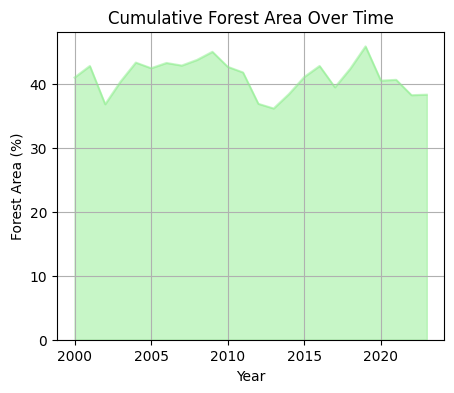

In [ ]:
plt.figure(figsize=(5, 4))
df_train.groupby('Year')['Forest Area (%)'].mean().plot(kind='area', color='lightgreen', alpha=0.5)
plt.title('Cumulative Forest Area Over Time')
plt.xlabel('Year')
plt.ylabel('Forest Area (%)')
plt.grid(True)
plt.show()

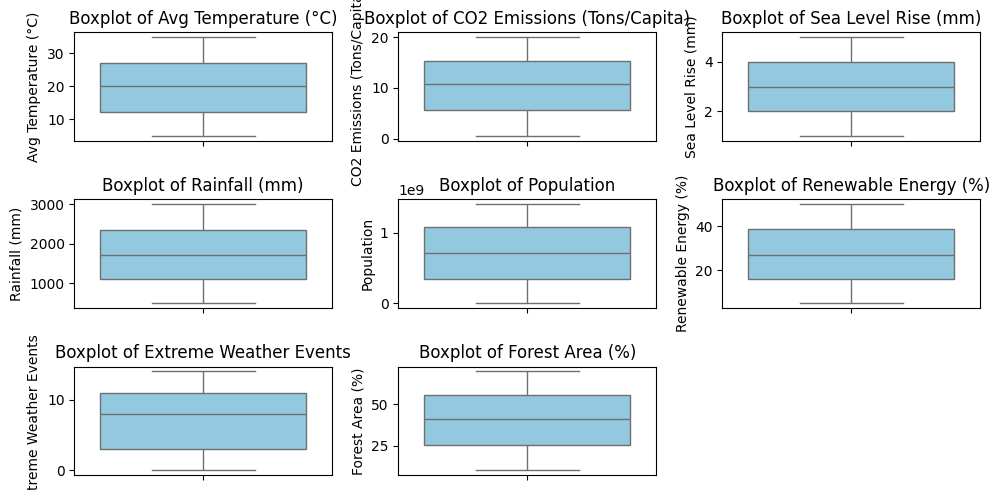

In [ ]:
# List of quantitative columns that need to be checked for exceptions
columns_to_check = ["Avg Temperature (°C)","CO2 Emissions (Tons/Capita)", "Sea Level Rise (mm)","Rainfall (mm)","Population",
                    "Renewable Energy (%)","Extreme Weather Events","Forest Area (%)"]
# boxplot for each column
plt.figure(figsize=(10, 5))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # create mesh 3x3
    sns.boxplot(y=df_data[column], color="skyblue")
    plt.title(f"Boxplot of {column}")
    plt.xlabel("")  # delete label x
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Data Pre-processing

## Data Cleaning

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 82 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         750 non-null    int64  
 1   Country                      750 non-null    object 
 2   CO2 Emissions (Tons/Capita)  750 non-null    float64
 3   Sea Level Rise (mm)          750 non-null    float64
 4   Rainfall (mm)                750 non-null    int64  
 5   Population                   750 non-null    int64  
 6   Renewable Energy (%)         750 non-null    float64
 7   Extreme Weather Events       750 non-null    int64  
 8   Forest Area (%)              750 non-null    float64
 9   Avg Temperature (°C)         750 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 80.6+ KB


<Axes: >

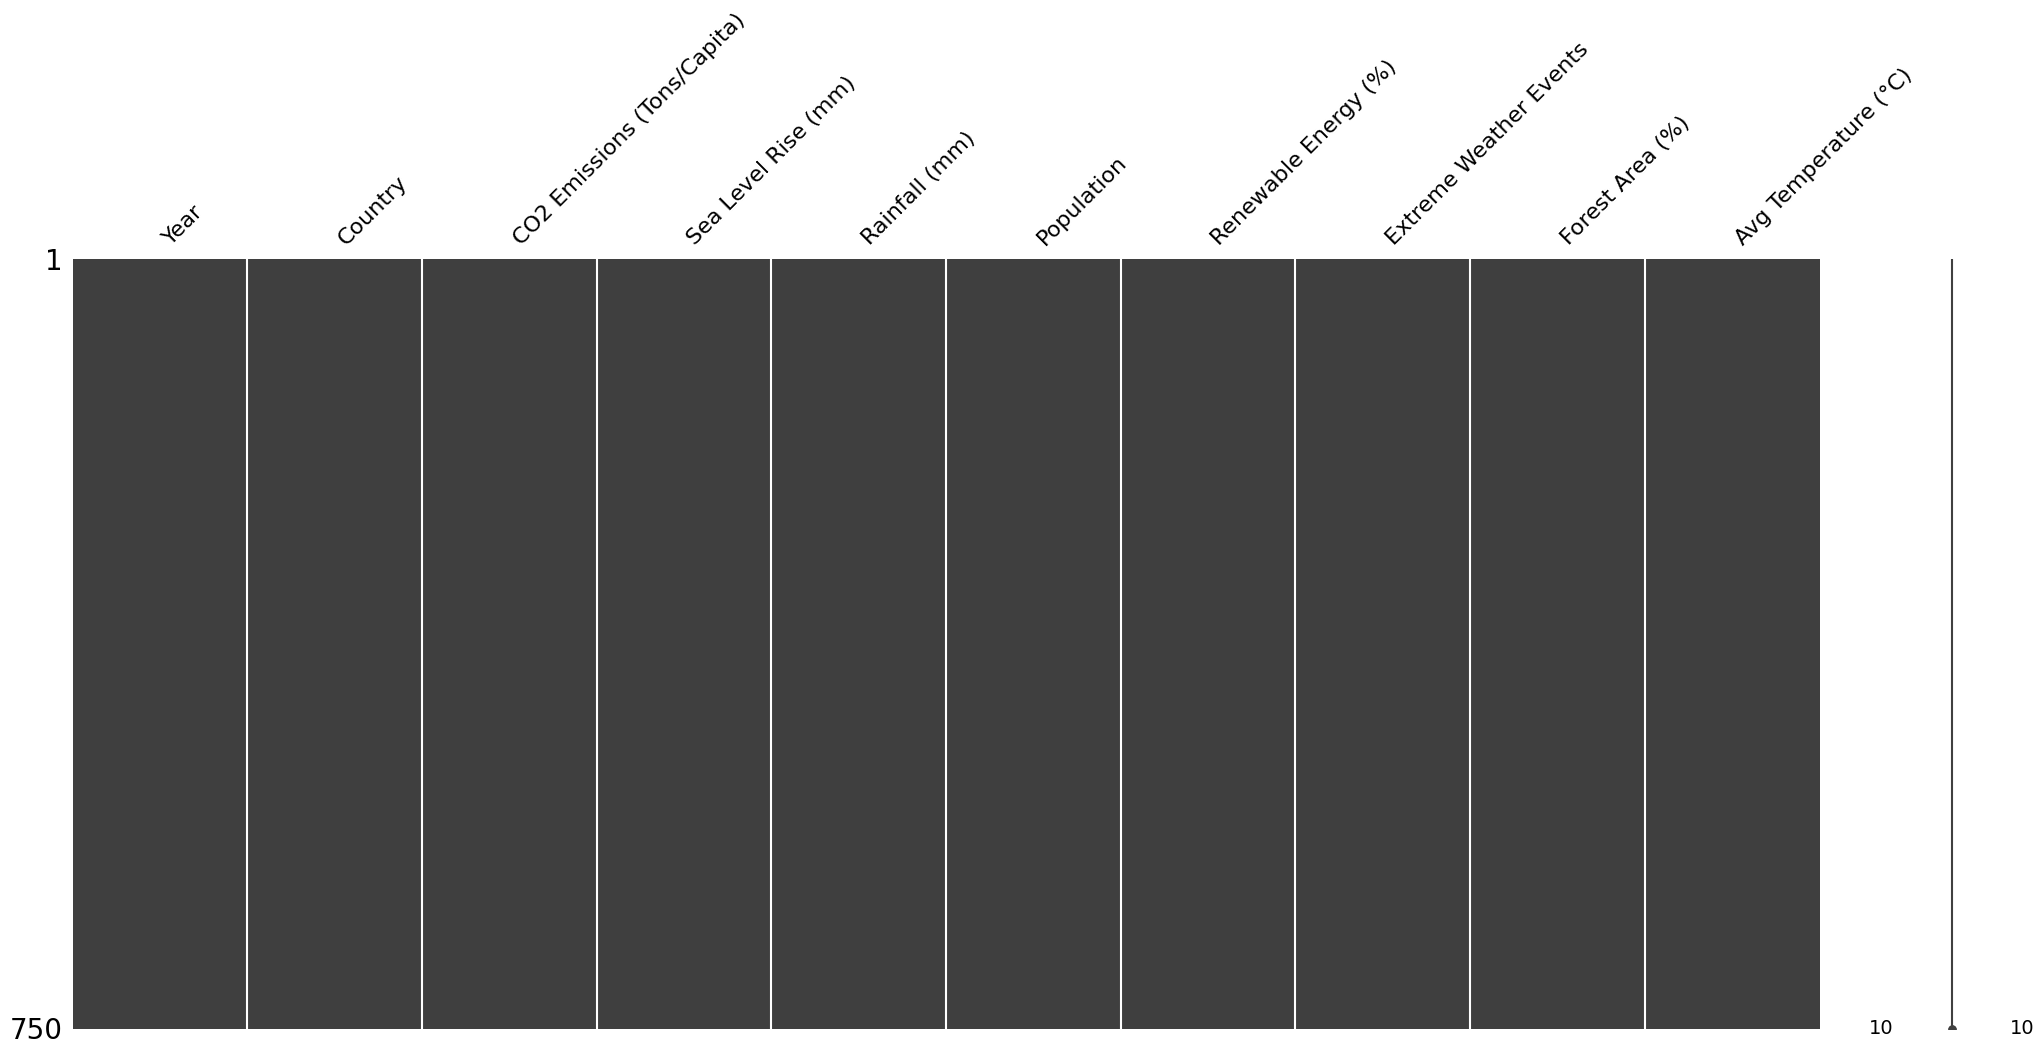

In [ ]:
# Generates a matrix plot of missing values in the DataFrame 'df_train'
msno.matrix(df_train)

In [ ]:
# Check if there are any missing values ​​in the entire dataset
missing_values = df_train.isnull().sum()

# Display the number of missing values ​​per column
print(missing_values)

Year                           0
Country                        0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
Avg Temperature (°C)           0
dtype: int64


In [ ]:
# Check if there are 0 values ​​in the entire dataset
zero_values = (df_train == 0).sum()

# Displays the number of 0 values ​​per column
print(zero_values)

Year                            0
Country                         0
CO2 Emissions (Tons/Capita)     0
Sea Level Rise (mm)             0
Rainfall (mm)                   0
Population                      0
Renewable Energy (%)            0
Extreme Weather Events         57
Forest Area (%)                 0
Avg Temperature (°C)            0
dtype: int64


In [ ]:
X_train.describe()

,Year,CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
count,750.00000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000
mean,2011.31600,10.476800,3.043200,1747.590667,7.103499e+08,27.463333,7.185333,41.038133
std,7.27691,5.592122,1.154616,715.585741,4.105829e+08,13.069162,4.488710,17.401766
min,2000.00000,0.500000,1.000000,518.000000,3.660891e+06,5.200000,0.000000,10.100000
25%,2005.00000,5.700000,2.000000,1094.250000,3.511076e+08,16.125000,3.000000,25.925000
50%,2012.00000,10.800000,3.100000,1761.500000,7.202765e+08,27.300000,7.000000,41.700000
75%,2018.00000,15.400000,4.100000,2369.750000,1.078198e+09,39.275000,11.000000,56.300000
max,2023.00000,20.000000,5.000000,2999.000000,1.397016e+09,50.000000,14.000000,70.000000


In [ ]:
# Descriptive statistics of global average temperature
country_temp_stats = df_train["Avg Temperature (°C)"].describe()
print(country_temp_stats)
# Get Q1, Q3, and IQR
Q1 = country_temp_stats["25%"]
Q3 = country_temp_stats["75%"]
IQR = Q3 - Q1
# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = df_train[(df_train["Avg Temperature (°C)"] < lower_bound) | (df_train["Avg Temperature (°C)"] > upper_bound)]
# Count the number of outliers
outlier_count = len(outliers)
# Display the number of outliers
print(f"Number of outliers: {outlier_count}")

count    750.000000
mean      19.906000
std        8.472946
min        5.000000
25%       12.300000
50%       20.050000
75%       27.300000
max       34.900000
Name: Avg Temperature (°C), dtype: float64
Number of outliers: 0


## Data Transformation

In [ ]:
df_train.dtypes

,0
Year,int64
Country,object
CO2 Emissions (Tons/Capita),float64
Sea Level Rise (mm),float64
Rainfall (mm),int64
Population,int64
Renewable Energy (%),float64
Extreme Weather Events,int64
Forest Area (%),float64
Avg Temperature (°C),float64


In [ ]:
# Change the data type of a particular column if necessary
df_train['Year'] = pd.to_datetime(df_train['Year'], format='%Y').dt.year  # Change the Year column to datetime type

print(df_train.info())



<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 82 to 102
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         750 non-null    int32  
 1   Country                      750 non-null    object 
 2   CO2 Emissions (Tons/Capita)  750 non-null    float64
 3   Sea Level Rise (mm)          750 non-null    float64
 4   Rainfall (mm)                750 non-null    int64  
 5   Population                   750 non-null    int64  
 6   Renewable Energy (%)         750 non-null    float64
 7   Extreme Weather Events       750 non-null    int64  
 8   Forest Area (%)              750 non-null    float64
 9   Avg Temperature (°C)         750 non-null    float64
dtypes: float64(5), int32(1), int64(3), object(1)
memory usage: 77.7+ KB
None


In [ ]:
print(df_train[['Year']].head())

     Year
82   2007
991  2005
789  2004
894  2023
398  2018


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Convert taxonomy columns to numbers (used for each separate taxonomy column)
X_train_encoded = X_train.copy()
for column in X_train_encoded.select_dtypes(include=['object']).columns:
    X_train_encoded[column] = label_encoder.fit_transform(X_train_encoded[column])
print(X_train_encoded)

     Year  Country  CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)  \
82   2007        7                          9.1                  1.9   
991  2005        8                          6.3                  4.3   
789  2004        8                          5.3                  1.5   
894  2023        5                          4.5                  3.2   
398  2018        2                          3.0                  3.9   
..    ...      ...                          ...                  ...   
106  2002        2                         14.5                  3.1   
270  2022        6                          6.4                  1.3   
860  2009       11                         12.4                  1.1   
435  2009        0                         17.2                  3.7   
102  2010        0                         13.6                  1.2   

     Rainfall (mm)  Population  Renewable Energy (%)  Extreme Weather Events  \
82            1143  1223349324                  41.0   

In [ ]:
# standardization data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)

## Data reduction

Explained variance ratio: [0.12325304 0.12145361 0.11640752 0.11418456 0.11127442 0.11112717
 0.10694299 0.10040969 0.09494701]


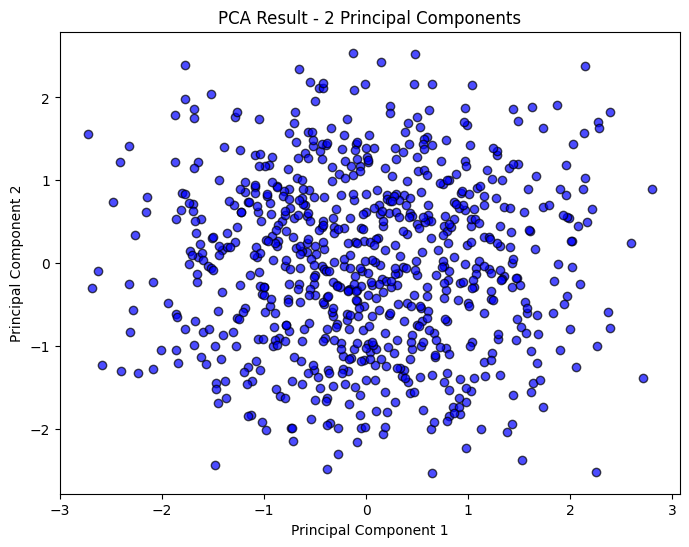

In [ ]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
#Check the proportion of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)
# visualization
X_train_pca_2d = X_train_pca[:, :2]  # Take the first 2 main features
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA Result - 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Model training and evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Create  Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train model
rf.fit(X_train_pca, y_train)

# Predict value
rf_train_pred = rf.predict(X_train_pca)

# evaluation
rf_train_r2 = metrics.r2_score(y_train, rf_train_pred)
rf_train_mse = metrics.mean_squared_error(y_train, rf_train_pred)
rf_train_rmse = metrics.mean_squared_error(y_train, rf_train_pred)
rf_train_mae = metrics.mean_absolute_error(y_train, rf_train_pred)


print(
    f"""
    R^2 score: {rf_train_r2}
    RF_train_MSE: {rf_train_mse}
    RF_train_RMSE: {rf_train_rmse}
    RF__MAE: {rf_train_mae}
    """
)


    R^2 score: 0.8490174744631075
    RF_train_MSE: 10.824706863999994
    RF_train_RMSE: 10.824706863999994
    RF__MAE: 2.783197333333333
    


In [ ]:
from sklearn.linear_model import LinearRegression

# create RidgeCV
lr = LinearRegression()

# train model
lr.fit(X_train_pca, y_train)

# predict value
lr_train_pred = lr.predict(X_train_pca)

# evaluae
lr_train_r2 = metrics.r2_score(y_train, lr_train_pred)
lr_train_mse = metrics.mean_squared_error(y_train, lr_train_pred)
lr_train_rmse = metrics.mean_squared_error(y_train, lr_train_pred)
lr_train_mae = metrics.mean_absolute_error(y_train, lr_train_pred)


print(
    f"""
    R^2 score: {lr_train_r2}
    lr_train_MSE: {lr_train_mse}
    lr_train_RMSE: {lr_train_rmse}
    lr_train_MAE: {lr_train_mae}
    """
)


    R^2 score: 0.013355915433228227
    lr_train_MSE: 70.73754367637227
    lr_train_RMSE: 70.73754367637227
    lr_train_MAE: 7.287136978007546
    


In [ ]:
from sklearn.linear_model import RidgeCV

# Create RidgeCV
ridge_cv = RidgeCV(alphas = [1e-3, 1e-2, 1e-1,1e0, 1e1])

# Train model
ridge_cv.fit(X_train_pca, y_train)

# Predicit value
ridge_train_pred = ridge_cv.predict(X_train_pca)

# Evaluate
ridge_train_r2 = metrics.r2_score(y_train, ridge_train_pred)
ridge_train_mse = metrics.mean_squared_error(y_train, ridge_train_pred)
ridge_train_rmse = metrics.mean_squared_error(y_train, ridge_train_pred)
ridge_train_mae = metrics.mean_absolute_error(y_train, ridge_train_pred)


print(
    f"""
    R^2 score: {ridge_train_r2}
    Ridge_train_MSE: {ridge_train_mse}
    Ridge_train_RMSE: {ridge_train_rmse}
    Ridge_train_MAE: {ridge_train_mae}
    """
)





    R^2 score: 0.013353715807003952
    Ridge_train_MSE: 70.73770137878851
    Ridge_train_RMSE: 70.73770137878851
    Ridge_train_MAE: 7.287458135822053
    


# Model improvement

## Hyperparameter Tuning

In [ ]:
# Define the estimator (Random Forest model)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_pca, y_train)

RandomForestRegressor()

In [ ]:
imp_features = pd.DataFrame({
    'columns':X_train.columns,
    'importance': rf.feature_importances_
    })


In [ ]:
imp_features.sort_values(by='importance', ascending= False)

,columns,importance
4,Rainfall (mm),0.125349
3,Sea Level Rise (mm),0.122350
2,CO2 Emissions (Tons/Capita),0.116873
1,Country,0.115199
0,Year,0.109294
6,Renewable Energy (%),0.109147
7,Extreme Weather Events,0.107440
8,Forest Area (%),0.100167
5,Population,0.094180


### GridSearchCV

In [ ]:
#Import libary
from sklearn.model_selection import GridSearchCV

In [ ]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [3, 10, 30], # The number of trees in the forest.
    'max_features' : [2, 4, 6, 8]

}

In [ ]:
# Use GridSearchCV to perform hyperparameter optimization
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)


In [ ]:
# train model
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]})

In [ ]:
# This retrieves the best Random Forest model
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [ ]:
# best combination found
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [ ]:
# Predict value
y_train_pred = grid_search.best_estimator_.predict(X_train_pca)

# Evaluate
rf_train_r2 = metrics.r2_score(y_train, y_train_pred)
rf_train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rf_train_rmse = metrics.mean_squared_error(y_train, y_train_pred)
rf_train_mae = metrics.mean_absolute_error(y_train, y_train_pred)

print(f"Random Forest - Training R2: {rf_train_r2:.4f}")
print(f"Random Forest - Training MSE: {rf_train_mse:.4f}")
print(f"Random Forest - Training RMSE: {rf_train_rmse:.4f}")
print(f"Random Forest - Training MAE: {rf_train_mae:.4f}")

Random Forest - Training R2: 0.8499
Random Forest - Training MSE: 10.7621
Random Forest - Training RMSE: 10.7621
Random Forest - Training MAE: 2.7062


# Test evaluation

In [ ]:
# show test data
df_test

,Year,Country,CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Avg Temperature (°C)
521,2012,USA,15.7,1.7,1187,918159557,23.4,10,44.5,19.4
737,2010,France,2.9,2.1,1085,218199220,17.1,14,65.9,14.0
740,2016,China,1.1,1.9,1034,438565972,30.2,9,56.7,19.9
660,2000,Mexico,5.5,1.4,1579,475061537,29.2,9,30.7,8.2
411,2005,France,18.6,2.5,1501,1030270792,21.5,11,63.4,29.7
...,...,...,...,...,...,...,...,...,...,...
109,2004,Germany,17.3,4.0,1441,440663289,8.8,8,63.6,18.0
430,2007,Germany,9.8,3.8,1592,637933053,34.0,13,61.5,9.8
77,2015,Australia,1.5,3.2,2271,428326345,49.8,6,17.0,6.2
84,2015,Russia,8.2,1.2,1001,74913944,37.3,9,41.6,23.4


In [ ]:
# Check if there are any missing values ​​in the entire dataset
missing_values = df_test.isnull().sum()

# Display the number of missing values ​​per column
print(missing_values)

Year                           0
Country                        0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
Avg Temperature (°C)           0
dtype: int64


In [ ]:
# Descriptive statistics of global average temperature
country_temp_stats = df_test["Avg Temperature (°C)"].describe()

print(country_temp_stats)

# Get Q1, Q3, and IQR
Q1 = country_temp_stats["25%"]
Q3 = country_temp_stats["75%"]
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_test[(df_test["Avg Temperature (°C)"] < lower_bound) | (df_test["Avg Temperature (°C)"] > upper_bound)]

# Count the number of outliers
outlier_count = len(outliers)

# Display the number of outliers
print(f"Number of outliers: {outlier_count}")

count    250.000000
mean      19.814400
std        8.766312
min        5.000000
25%       11.850000
50%       20.300000
75%       26.800000
max       34.800000
Name: Avg Temperature (°C), dtype: float64
Number of outliers: 0


In [ ]:
# Change the data type of a particular column if necessary
df_test['Year'] = pd.to_datetime(df_test['Year'], format='%Y').dt.year  # Change the Year column to datetime type

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 521 to 286
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         250 non-null    int32  
 1   Country                      250 non-null    object 
 2   CO2 Emissions (Tons/Capita)  250 non-null    float64
 3   Sea Level Rise (mm)          250 non-null    float64
 4   Rainfall (mm)                250 non-null    int64  
 5   Population                   250 non-null    int64  
 6   Renewable Energy (%)         250 non-null    float64
 7   Extreme Weather Events       250 non-null    int64  
 8   Forest Area (%)              250 non-null    float64
 9   Avg Temperature (°C)         250 non-null    float64
dtypes: float64(5), int32(1), int64(3), object(1)
memory usage: 28.6+ KB
None


In [ ]:
# Check if there are 0 values ​​in the entire dataset
zero_values = (df_test == 0).sum()

# Displays the number of 0 values ​​per column
print(zero_values)

Year                            0
Country                         0
CO2 Emissions (Tons/Capita)     0
Sea Level Rise (mm)             0
Rainfall (mm)                   0
Population                      0
Renewable Energy (%)            0
Extreme Weather Events         17
Forest Area (%)                 0
Avg Temperature (°C)            0
dtype: int64


In [ ]:
print(df_test[['Year']].head())

     Year
521  2012
737  2010
740  2016
660  2000
411  2005


In [ ]:
# Convert taxonomy columns to numbers (used for each separate taxonomy column)
X_test_encoded = X_test.copy()
for column in X_test_encoded.select_dtypes(include=['object']).columns:
    X_test_encoded[column] = label_encoder.fit_transform(X_test_encoded[column])
print(X_test_encoded)

     Year  Country  CO2 Emissions (Tons/Capita)  Sea Level Rise (mm)  \
521  2012       14                         15.7                  1.7   
737  2010        5                          2.9                  2.1   
740  2016        4                          1.1                  1.9   
660  2000       10                          5.5                  1.4   
411  2005        5                         18.6                  2.5   
..    ...      ...                          ...                  ...   
109  2004        6                         17.3                  4.0   
430  2007        6                          9.8                  3.8   
77   2015        1                          1.5                  3.2   
84   2015       11                          8.2                  1.2   
286  2016        7                         19.9                  3.8   

     Rainfall (mm)  Population  Renewable Energy (%)  Extreme Weather Events  \
521           1187   918159557                  23.4   

In [ ]:
# standardization for test data
scaler = StandardScaler()

X_test_scaled = scaler.fit_transform(X_test_encoded)

Explained variance ratio: [0.15371823 0.13414084 0.12780532 0.11509441 0.10348732 0.09961734
 0.09400018 0.08793182 0.08420453]


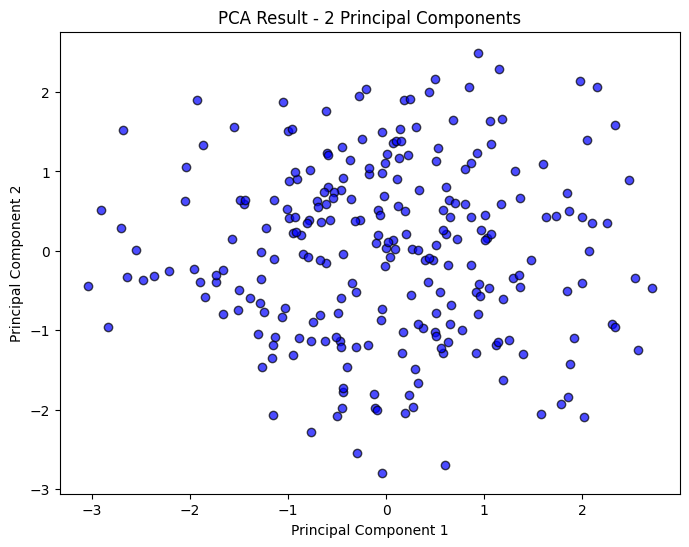

In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_test_pca = pca.fit_transform(X_test_scaled)

#Check the proportion of variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# visualization
X_test_pca_2d = X_test_pca[:, :2]  # Take the first 2 main features
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c='blue', edgecolor='k', alpha=0.7)
plt.title('PCA Result - 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# predict the values using unseen data
lr_test_pred = lr.predict(X_test_pca)

# calculate the evaluation metrics
lr_test_r2 = metrics.r2_score(y_test, lr_test_pred)
lr_test_mse = metrics.mean_squared_error(y_test, lr_test_pred)
lr_test_rmse = metrics.mean_squared_error(y_test, lr_test_pred)
lr_test_mae = metrics.mean_absolute_error(y_test, lr_test_pred)


print(f"""
R^2 score: {lr_test_r2}
lr_test_MSE: {lr_test_mse}
lr_test_RMSE: {lr_test_rmse}
lr_test_MAE: {lr_test_mae}
""")




R^2 score: 0.06682819331123635
lr_test_MSE: 71.42574708013109
lr_test_RMSE: 71.42574708013109
lr_test_MAE: 7.090487421576369



In [ ]:
# predict the values using unseen data
ridge_test_pred = ridge_cv.predict(X_test_pca)

# evaluation metrics
ridge_test_r2 = metrics.r2_score(y_test, ridge_test_pred)
ridge_test_mse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_rmse = metrics.mean_squared_error(y_test, ridge_test_pred)
ridge_test_mae = metrics.mean_absolute_error(y_test, ridge_test_pred)


print(
    f"""
    R^2 score: {ridge_test_r2}
    Ridge_test_MSE: {ridge_test_mse}
    Ridge_test_RMSE: {ridge_test_rmse}
    Ridge_test_MAE: {ridge_test_mae}
    """
)



    R^2 score: 0.0667174701746025
    Ridge_test_MSE: 71.43422192120156
    Ridge_test_RMSE: 71.43422192120156
    Ridge_test_MAE: 7.096844007957623
    


In [ ]:
# Predict with GridSearchCV
y_test_pred = grid_search.best_estimator_.predict(X_test_pca)

# Evaluate
rf_test_r2 = metrics.r2_score(y_test, y_test_pred)
rf_test_mse = metrics.mean_squared_error(y_test, y_test_pred)
rf_test_rmse = metrics.mean_squared_error(y_test, y_test_pred)
rf_test_mae = metrics.mean_absolute_error(y_test, y_test_pred)

print(f"Random Forest -  R2: {rf_test_r2:.4f}")
print(f"Random Forest - MSE: {rf_test_mse:.4f}")
print(f"Random Forest - RMSE: {rf_test_rmse:.4f}")
print(f"Random Forest -  MAE: {rf_test_mae:.4f}")


Random Forest -  R2: 0.8182
Random Forest - MSE: 13.9121
Random Forest - RMSE: 13.9121
Random Forest -  MAE: 2.9758
